In [1]:
#importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

#Reading CSV file using pandas Dataframe 
cp = pd.read_csv("F:\Data Science\carprice.csv")
print(cp.head(2))

   car_ID  symboling              CarName fueltype aspiration doornumber  \
0       1          3   alfa-romero giulia      gas        std        two   
1       2          3  alfa-romero stelvio      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  

[2 rows x 26 columns]


In [2]:
#Shape and Size of the dataset
print("Shape : ",cp.shape)
print("Size : ",cp.size)

Shape :  (205, 26)
Size :  5330


In [3]:
#Datatypes of variable
print(cp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
#Checking for null values
print(cp.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [5]:
#Selecting categorical columns
obj = cp.select_dtypes(include=[object])
obj.head(3)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi


In [6]:
#Converting categorical values into numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
obj_to_int = obj.apply(le.fit_transform)
obj_to_int.head(3)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2,1,0,1,0,2,0,0,2,5
1,3,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5


In [7]:
#Droping Caregorical values
cp.drop(["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber",
        "fuelsystem"],axis=1,inplace=True)

In [8]:
#Adding converted numerical values into dataset
cp["CarName"]=obj_to_int["CarName"]
cp["fueltype"]=obj_to_int["fueltype"]
cp["aspiration"]=obj_to_int["aspiration"]
cp["doornumber"]=obj_to_int["doornumber"]
cp["carbody"]=obj_to_int["carbody"]
cp["drivewheel"]=obj_to_int["drivewheel"]
cp["enginelocation"]=obj_to_int["enginelocation"]
cp["enginetype"]=obj_to_int["enginetype"]
cp["cylindernumber"]=obj_to_int["cylindernumber"]
cp["fuelsystem"]=obj_to_int["fuelsystem"]

In [9]:
#Assigning 'price' to another variable 'Price' and dropping it
Price = cp["price"]
cp.drop(["price"],axis=1,inplace=True)

In [10]:
cp["price"]=Price

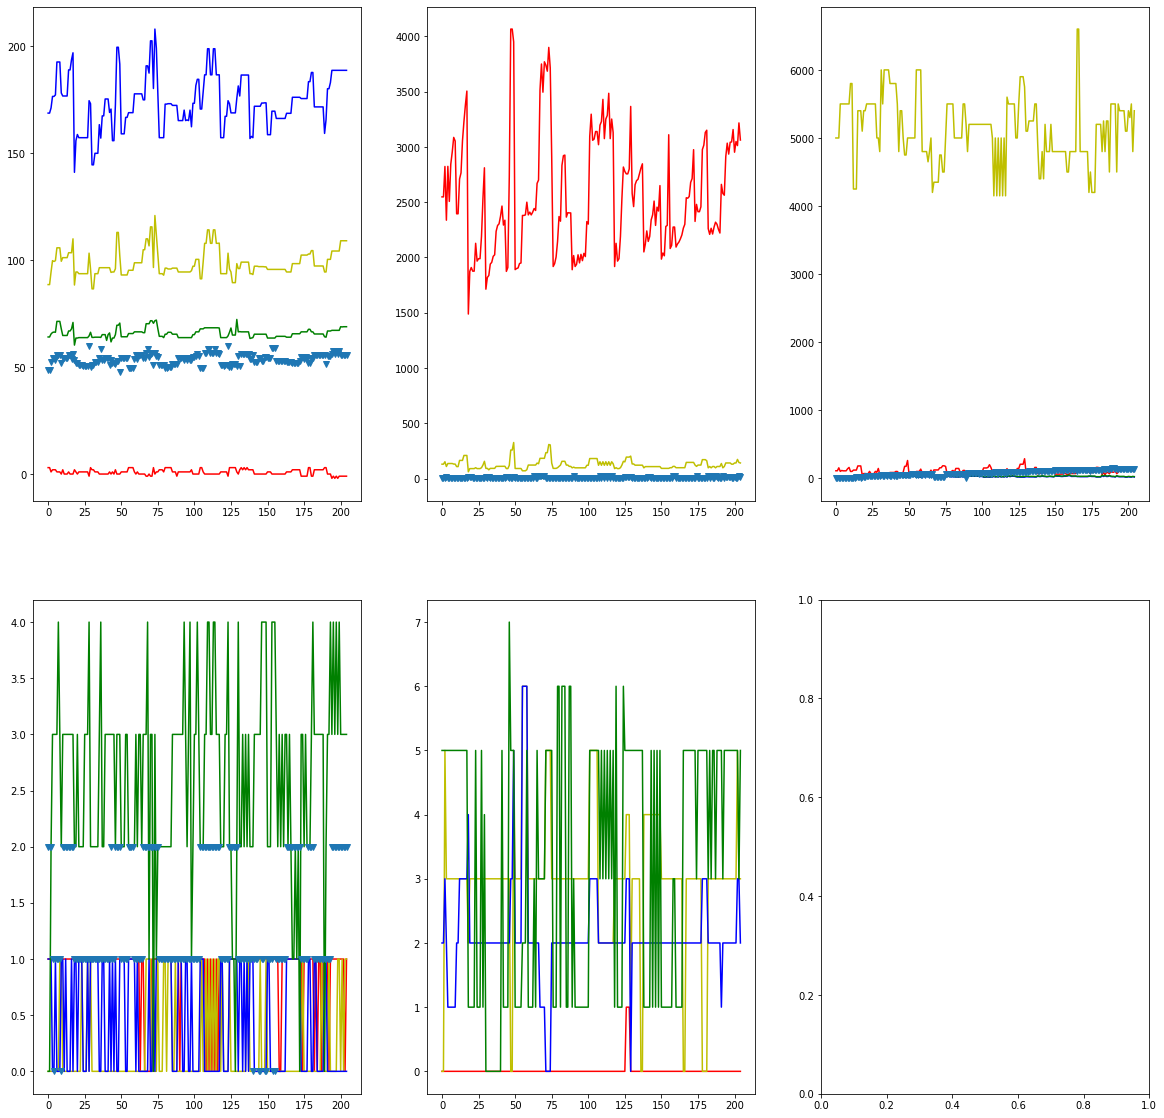

In [11]:
#Visualizing Independent variables
fig, a = plt.subplots(2,3,figsize=(20,20))
a[0][0].plot(cp['symboling'],"r",cp['wheelbase'],"y",cp['carlength'],"b",cp['carwidth'],"g",cp['carheight'],"v")
a[0][1].plot(cp['curbweight'],"r",cp['enginesize'],"y",cp['boreratio'],"b",cp['stroke'],"g",cp['compressionratio'],"v")
a[0][2].plot(cp['horsepower'],"r",cp['peakrpm'],"y",cp['citympg'],"b",cp['highwaympg'],"g",cp['CarName'],"v")
a[1][0].plot(cp['fueltype'],"r",cp['aspiration'],"y",cp['doornumber'],"b",cp['carbody'],"g",cp['drivewheel'],"v")
a[1][1].plot(cp['enginelocation'],"r",cp['enginetype'],"y",cp['cylindernumber'],"b",cp['fuelsystem'],"g")
plt.show()

In [12]:
#Assigning Independent variables to X and Dependent variable to y
X = cp[['carlength','curbweight','peakrpm','fueltype', 'aspiration', 'doornumber', 'carbody','enginetype', 
       'cylindernumber','fuelsystem']]
y = cp["price"]

In [13]:
#Importing train_test_split module
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [14]:
#Fitting LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
#Predicting X_test values
y_pred = reg.predict(X_test)
print(y_pred)

[ 4523.13131242 16131.37966742 12030.07249314 -2370.07438562
 10336.7579514  16775.6239409   6313.465552    5939.53257401
 22566.93363567  8384.61232513 10301.02581433 26197.30506353
 15364.54751389 13400.33692279  4990.34161031 12535.67418422
 10513.05592073 17324.99576683 11765.1637334   6983.3759913
 10703.785731   18804.0048444  12183.4117343  14857.15792705
 17569.25727226  7110.08856706  5418.97158122 19237.55298269
  8419.84719295  2440.76226357  6725.69161026 11534.34936972
 18070.91998924  6542.54925787  4661.41789865 23292.00464949
 15552.33898662 14434.50193643  5715.29182685 32606.86478602
  2969.07721694]


In [16]:
#Slope and Intercept
print("Slope: ",reg.intercept_)
print("Coefficient: ",reg.coef_)

Slope:  -30606.253859037206
Coefficient:  [  -11.50625978    14.24223155     3.16894792 -1345.59326733
 -1419.7800995  -1522.78628908 -2416.94411814   813.41470059
  -332.39395451   -89.34802081]


In [17]:
#Accuracy is about 68% when we consider ['carlength','curbweight','peakrpm','fueltype', 'aspiration', 
#'doornumber', 'carbody','enginetype','cylindernumber','fuelsystem'] as Independent Variables
from sklearn.metrics import r2_score
print("Accuracy: ",r2_score(y_test,y_pred))

Accuracy:  0.6848918874631897


In [18]:
#prediction
print(reg.predict([[178,2800,5200,0,1,0,2,4,1,3]]))

[20101.96189593]


In [ ]:
#Using Different Independent Values for the model

In [19]:
#Assigning Independent variables to X and Dependent variable to y
X = cp[['symboling', 'wheelbase','carwidth','carheight','enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower','citympg', 'highwaympg',
       'CarName','drivewheel', 'enginelocation']]
y = cp["price"]

In [20]:
#Importing train_test_split module
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [21]:
#Fitting LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
#Predicting X_test values
y_pred = reg.predict(X_test)
print(y_pred)

[ 7052.35629081 18235.70052351 16143.35286992   161.60310166
  9100.09627714 12648.09776801  6633.51973832  4800.61844354
 20313.03054516  7709.12049678 18629.68152933 29838.19164551
 10530.24365162 14504.72174566  6388.92839807 12675.56808621
  9901.4431373  21715.0894739   9959.89328397  5540.30051139
 10784.75283789 19502.1076187   9865.90772068 12977.74158633
 20482.21603818  6559.21521297  6270.03548792 20404.73574596
  6787.93662979  8506.23825214  8376.39683738 10120.21590556
 17299.53483257 10364.29339548  6418.49406947 25987.42167884
  6998.11248068 14654.3692444   7403.02229749 37717.45072979
  6526.52085843]


In [23]:
#Slope and Intercept
print("Slope: ",reg.intercept_)
print("Coefficient: ",reg.coef_)

Slope:  -58680.0207996307
Coefficient:  [  110.12214217   143.27430591   900.2300988     67.7302963
    69.97240208 -2292.66991281 -2600.63987009   136.94004705
    32.80855361   -64.77286356   -42.39943069   -27.47031819
  1427.13700888 14438.25930732]


In [24]:
#Accuracy is about 68% when we consider ['carlength','curbweight','peakrpm','fueltype', 'aspiration', 
#'doornumber', 'carbody','enginetype','cylindernumber','fuelsystem'] as Independent Variables
from sklearn.metrics import r2_score
print("Accuracy: ",r2_score(y_test,y_pred))

Accuracy:  0.8310516902268442


In [25]:
#prediction
print(reg.predict([[3,100.2,66.5,53.5,140,3.5,2.2,7.5,100,25,21,140,2,0]]))

[16352.31293602]
